# Faltung

Die Faltung zweier Funktion $x(t)$ und $h(t)$ ergibt eine neue Funktion $y(t)$ und wird definiert als das Integral

$$
\int_{-\infty}^\infty x(\tau) h(t-\tau)d\tau := x(t) \ast h(t) =  (x \ast h)(t) = y(t)
$$

oder im diskreten Fall durch 

$$(x * h)(t) = \sum_{k} x(k) h(t - k)$$

Die Faltungsfunktion $h$ wird auch Gewichtsfunktion genannt. Der Name wird deutlich bei der Interpretation als Filtermaske.



# Faltungstheorem

(Herleitung gemäß Fouriertransformation für Fußgänger, Tilman Butz, Springer 2011)

Die Fouriertransformierte der Faltung ergibt

$$
Y(f)=\int_{-\infty}^\infty y(t)  e^{-\imath 2\pi f t} dt 
$$

Einsetzen von $y(t)=\int_{-\infty}^\infty x(\tau) h(t-\tau)d\tau$ liefert 

$$=\int_{-\infty}^\infty \left[\int_{-\infty}^\infty x(\tau) h(t-\tau)   d\tau \right] e^{-\imath 2\pi f t} dt$$

erweitert mit $e^{-\imath 2\pi f \tau}e^{\imath 2\pi f \tau}=1$ 

$$=\int_{-\infty}^\infty x(\tau) e^{-\imath 2\pi f \tau}\left[\int_{-\infty}^\infty  h(t-\tau) e^{-\imath 2\pi f (t- \tau)}   dt  \right]  d\tau $$



mit Variablentransformation $t'=t-\tau$ erhalten wir

$$=\int_{-\infty}^\infty x(\tau) e^{-\imath 2\pi f \tau} H(f)$$

$$Y(f)=X(f) H(f)$$


Aus dem Faltungsintegral $\ast$ wird durch Fouriertransformation ein einfaches Produkt! Dies ist die wichtige Aussage des Faltungstheorems, welche die Implementierung von schnellen Faltungs-Filtern mittels FFT ermöglicht.

$$ y(t)=x(t)\ast h(t) $$

$$ Y(f)=X(f) H(f)$$

Die Korrelation $\int_{-\infty}^\infty x(t) y(t+\tau)d\tau$ ergibt sich analog aus dem Produkt mit der komplex konjugierten Fouriertransformation $X^*(f)Y(f)$.


# Wiener-Chintschin-Theorem 

Das Wiener-Chintschin-Theorem, besagt, dass die spektrale Leistungsdichte eines stationären Zufallsprozesses die Fourier-Transformierte der korrespondierenden Autokorrelationsfunktion ist. Im Falle diskreter Zeitserien hat das Wiener-Chintschin-Theorem die Form:

$$S(f)=\sum_{k} r(k)e^{-\imath 2\pi k f}$$

mit der Autokorrelationsfunktion $r(k)$ und der spektralen Leistungsdichte $S(f)$.

# Parsevalsches Theorem

Die Energie eines Signals im Zeitbereich ist gleich seiner Energie im Frequenzbereich. Für diskrete Zeitserien gilt nach dem Parsevalschen Theorem

$$\sum_{t=0}^{N-1} | x(t) |^2  =  \frac{1}{N} \sum_{f=0}^{N-1} | X(f) |^2$$


# Beispiel: Mittelwertfilter implementiert als Faltung
## Python-Version

Populating the interactive namespace from numpy and matplotlib


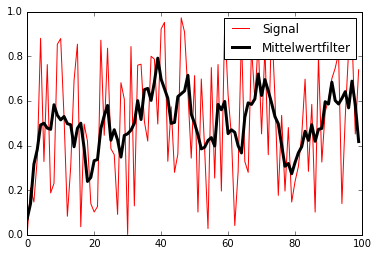

In [1]:
%pylab inline

x=rand(100)
w=5
h=ones(w)/w # Definiere Rechteckmaske mit Fläche=1
y=convolve(x,h,mode='same') # Faltungsoperation
plot(x,'r-',label='Signal')
plot(y,'k-',lw=3,label='Mittelwertfilter')
legend()

# Beispiel Octave Version

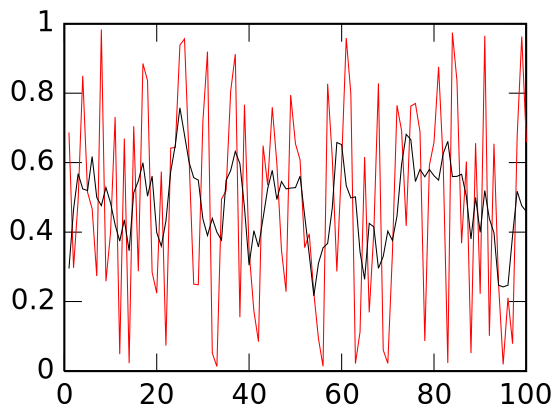

In [18]:
x=rand(100,1);
w=5;
h=ones(w,1)./w; % Definiere Rechteckmaske mit Fläche=1
y=conv(x,h,'SAME'); % Faltungsoperation
plot(x,'r-')
hold();
plot(y,'k-')